# Harnessing Probability Theory: Naive Bayes for Classification
Probability theory is a branch of mathematics which works to quanitfy uncertainty and randomness, providing us with a formal framework for expressing and manipulating randomness in various situations. Probability theory as a whole is quite extensive, covering the study of random variables and events as well as the principles governing the likelihood of different outcomes. Applications of probability theory extend from general statistics all the way to machine learning.  
  
Strap in, because here we will try and navigate the sophisticated interplay between probability theory and modern machine learning algorithms. Although we may only cover a miniscule portion of what probability theory has to offer to us machine learning engineers, I hope that this project can serve to ease you (the reader) into how we can view machine learning problems through the lens of probabilities.  
  
With this project, we will discuss some foundational concepts within probability theory and work through an example of applying these concepts to machine learning, using a Naive Bayes Classifier model to predict on the renowned Iris dataset. We will unravel the Bayesian approach to probability theory and delve into the inner workings of the Naive Bayes model, identifying why this combination of fields serves as a powerful framework for traditional machine learning tasks.  
  
# Probability Theory and its Conflicting Schools of Thought
In probability theory, there are various schools of thought which interpret probability in slightly different manners. Some of these include the frequentist approach, the Bayesian approach, and propensity theory. Each interpretation offers a distinct perspective on the nature of probability, and they often argue amongst each other as to which is the correct interpretation. For our purposes, we will cover the two most well-known approaches: frequentist and Bayesian. Please do note, however, that these are not the only interpretations of probability theory which exists.  
  
## Frequentist School
In the frequentist interpretation of probability, probability is defined as the limit of the relative frequency of an event occuring in a large number of trials. Here, probability is seen as an objective property of the physical world. Probability is seen to be based on the idea that as experiments are repeated infinitely, the observed relative frequency of an event converges to its true probability.  
  
For instance, consider flipping a coin and trying to understand the probability of landing heads with the frequentist approach. According to the frequentist perspective, the probability of getting heads is the limit of the number of heads divided by the total number of flips as we repeat the experiment infinitely. Therefore, if you were to flip a coin a million times, the ratio of heads to total flips would converge to the true probability of landing heads, or at least that's what frequentists believe.  
  
## Bayesian School
Now, the Bayesian interpretation involves both initial beliefs (known as priors) as well as updates to this belief. The revised prior is known as a posterior. The Bayesian interpretation views probability as a measure of belief or confidence in the occurence of an event. Then, the probability is updated based on prior knowledge along with every new piece of evidence we get. It allows for the incorporation of personal beliefs and uncertainties, making it particularly useful in decision-making under uncertainty.  
  
So, for the same example of trying to understand the probability of landing heads for a coin flip, the Bayesian thought process would go something like this. Initially, you would simply come up with a probability out of thin air and say something like the probability of landing heads is 0.4. This prior belief can be based on anything. Now, this may seem a bit odd, but, the most important concept here is that this prior should be revised into a posterior based on the new evidence that you gather. So, after a few flips, you would adjust your beliefs with the new data that you gathered. This school of thought proves to be very useful in trying to predict the probability of events which have not occured yet, such as trying to compute the probability that a brand new sports team will win a championship.
  
# Bayes' Theorem
Now, the name for the Bayesian approach comes from Rev. Thomas Bayes (as many of you may have guessed). Thomas Bayes was an 18th-century English statistician, philosopher, and Presbyterian minister, best known for formulating Bayes' theorem. His work laid the foundation for Bayesian statistics, which has become a key approach in modern statistical inference and machine learning.  
  
Bayes' theorem describes the probability of an event based on prior knowledge of conditions that might be related to the event. The formula for Bayes' Theorem follows:  

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$
  
Here, $P(A|B)$ is the probability of event A occurring given that event B has occurred. This is the posterior probability. $P(B|A)$ is the probability of event B occurring given that event A has occurred (the likelihood). And finally, $P(A)$ is the prior probability of event A and $P(B)$ is the probability of event B occurring. So, with the prior probability, we can use the likelihood and new evidence $P(B)$ to compute the posterior (or updated) probability. This theorem allows us to update our beliefs about the probability of an event based on new evidence we gain. And most importantly (for us), we can use it to update probabilities as new data becomes available, enabling a dynamic and iterative approach to statistical inference.

# Naive Bayes: Bayesian Probabilities in Machine Learning
Now, enter Naive Bayes, a classification algorithm that seamlessly integrates bayesian probabilities and machine learning. In the Naive Bayes framework, the algorithm's decision-making process is driven by Bayes' theorem, updating probabilities as it encounters new evidence.  
  
To explain this a bit, let's consider a simple machine learning classification task: classifying text as spam or not spam (otherwise known as spam or ham). Initially, the algorithm will begin with prior probabilities, and then as the algorithm processes each word in the text body, it would update these probabilities dynamically, refining its understanding with every piece of evidence.  
  
So what does the Naive part mean? Naive here means that the model assumes all features are independent of each other. In practice this is usually not entirely true, but this model still may return good performance in those situations. This is done in order to simplify the calculations. The algorithm treats each feature as independent, meaning that the presence or absence of a feature does not influence the existence of another feature given the class variable. Without this assumption, the algorithm would need to estimate and consider the joint probabilities of all possible combinations of features, making it extremely computationally expensive (and unviable at best). This is a trade off between model simplicity and computational efficiency versus the potential impact of the independence assumption on the performance of the model.  

# Starting our Project: The Data
Now that we have covered a good bit of background information on probability theory and the Naive Bayes algorithm, we can start looking at the data we will use for this project.  
  
The Iris dataset is a well-known collection of data commonly used in machine learning and statistics. Most of you may already know about this dataset, but for those who don't, here is a short description. This dataset was first introduced by British biologist and statistician Sir Ronald A. Fisher in 1936, and consists of measurements from 150 iris flowers. The data represents three different species of the iris flower: setosa, versicolor, and virginica. The species is our target variable for this classification problem. For each flower, four continuous features were recorded:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width  
  
The dataset has a perfect class balance. It contains 3 classes of 50 instances each. The Iris dataset is available from sklearn. So, let's begin by loading in our data. Here, we will set *as_frame* to True in order to get our data as a pandas dataframe.

In [19]:
# Imports
from sklearn import datasets

# load data
data = datasets.load_iris(as_frame = True).frame
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We can see that all our features are real-valued, and that our target classes are 0,1, and 2. Here, 0 maps to setosa, 1 to versicolor, and 2 to virginica.  
  
Right now, we just see a bunch of numbers; it would definitely help if we could visualize our data in some way, so let's do that. Currently, our feature set has 4 dimensions: sepal length, sepal width, petal length, and petal width. We could pick two of these dimensions and plot them on a cartesian plane, but that would mean what we would have to manually select them and risk missing out on the information that the other dimensions provide us. So, instead we can use Principal Component Analysis (PCA) for our dimensionality reduction needs. We will run PCA with 2 components, and PCA will find a set of axes in which the data varies the most and then project the data points onto that set of axes. These axes are also known as principal components. Take a look at the image below to see what these principal components may look like. 

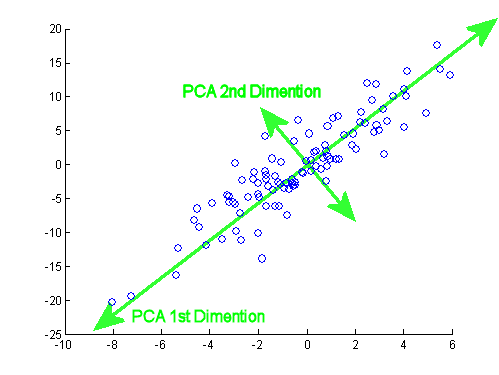
  
First, we will get our X (features) and y (labels). PCA is available from sklearn, so we will make use of that next. This really just consists of us defining a PCA object and then running the fit_transform() method on our features. Afterwards, we will plot the 2 principal components on a simple scatterplot using seaborn, coloring the points by their class.

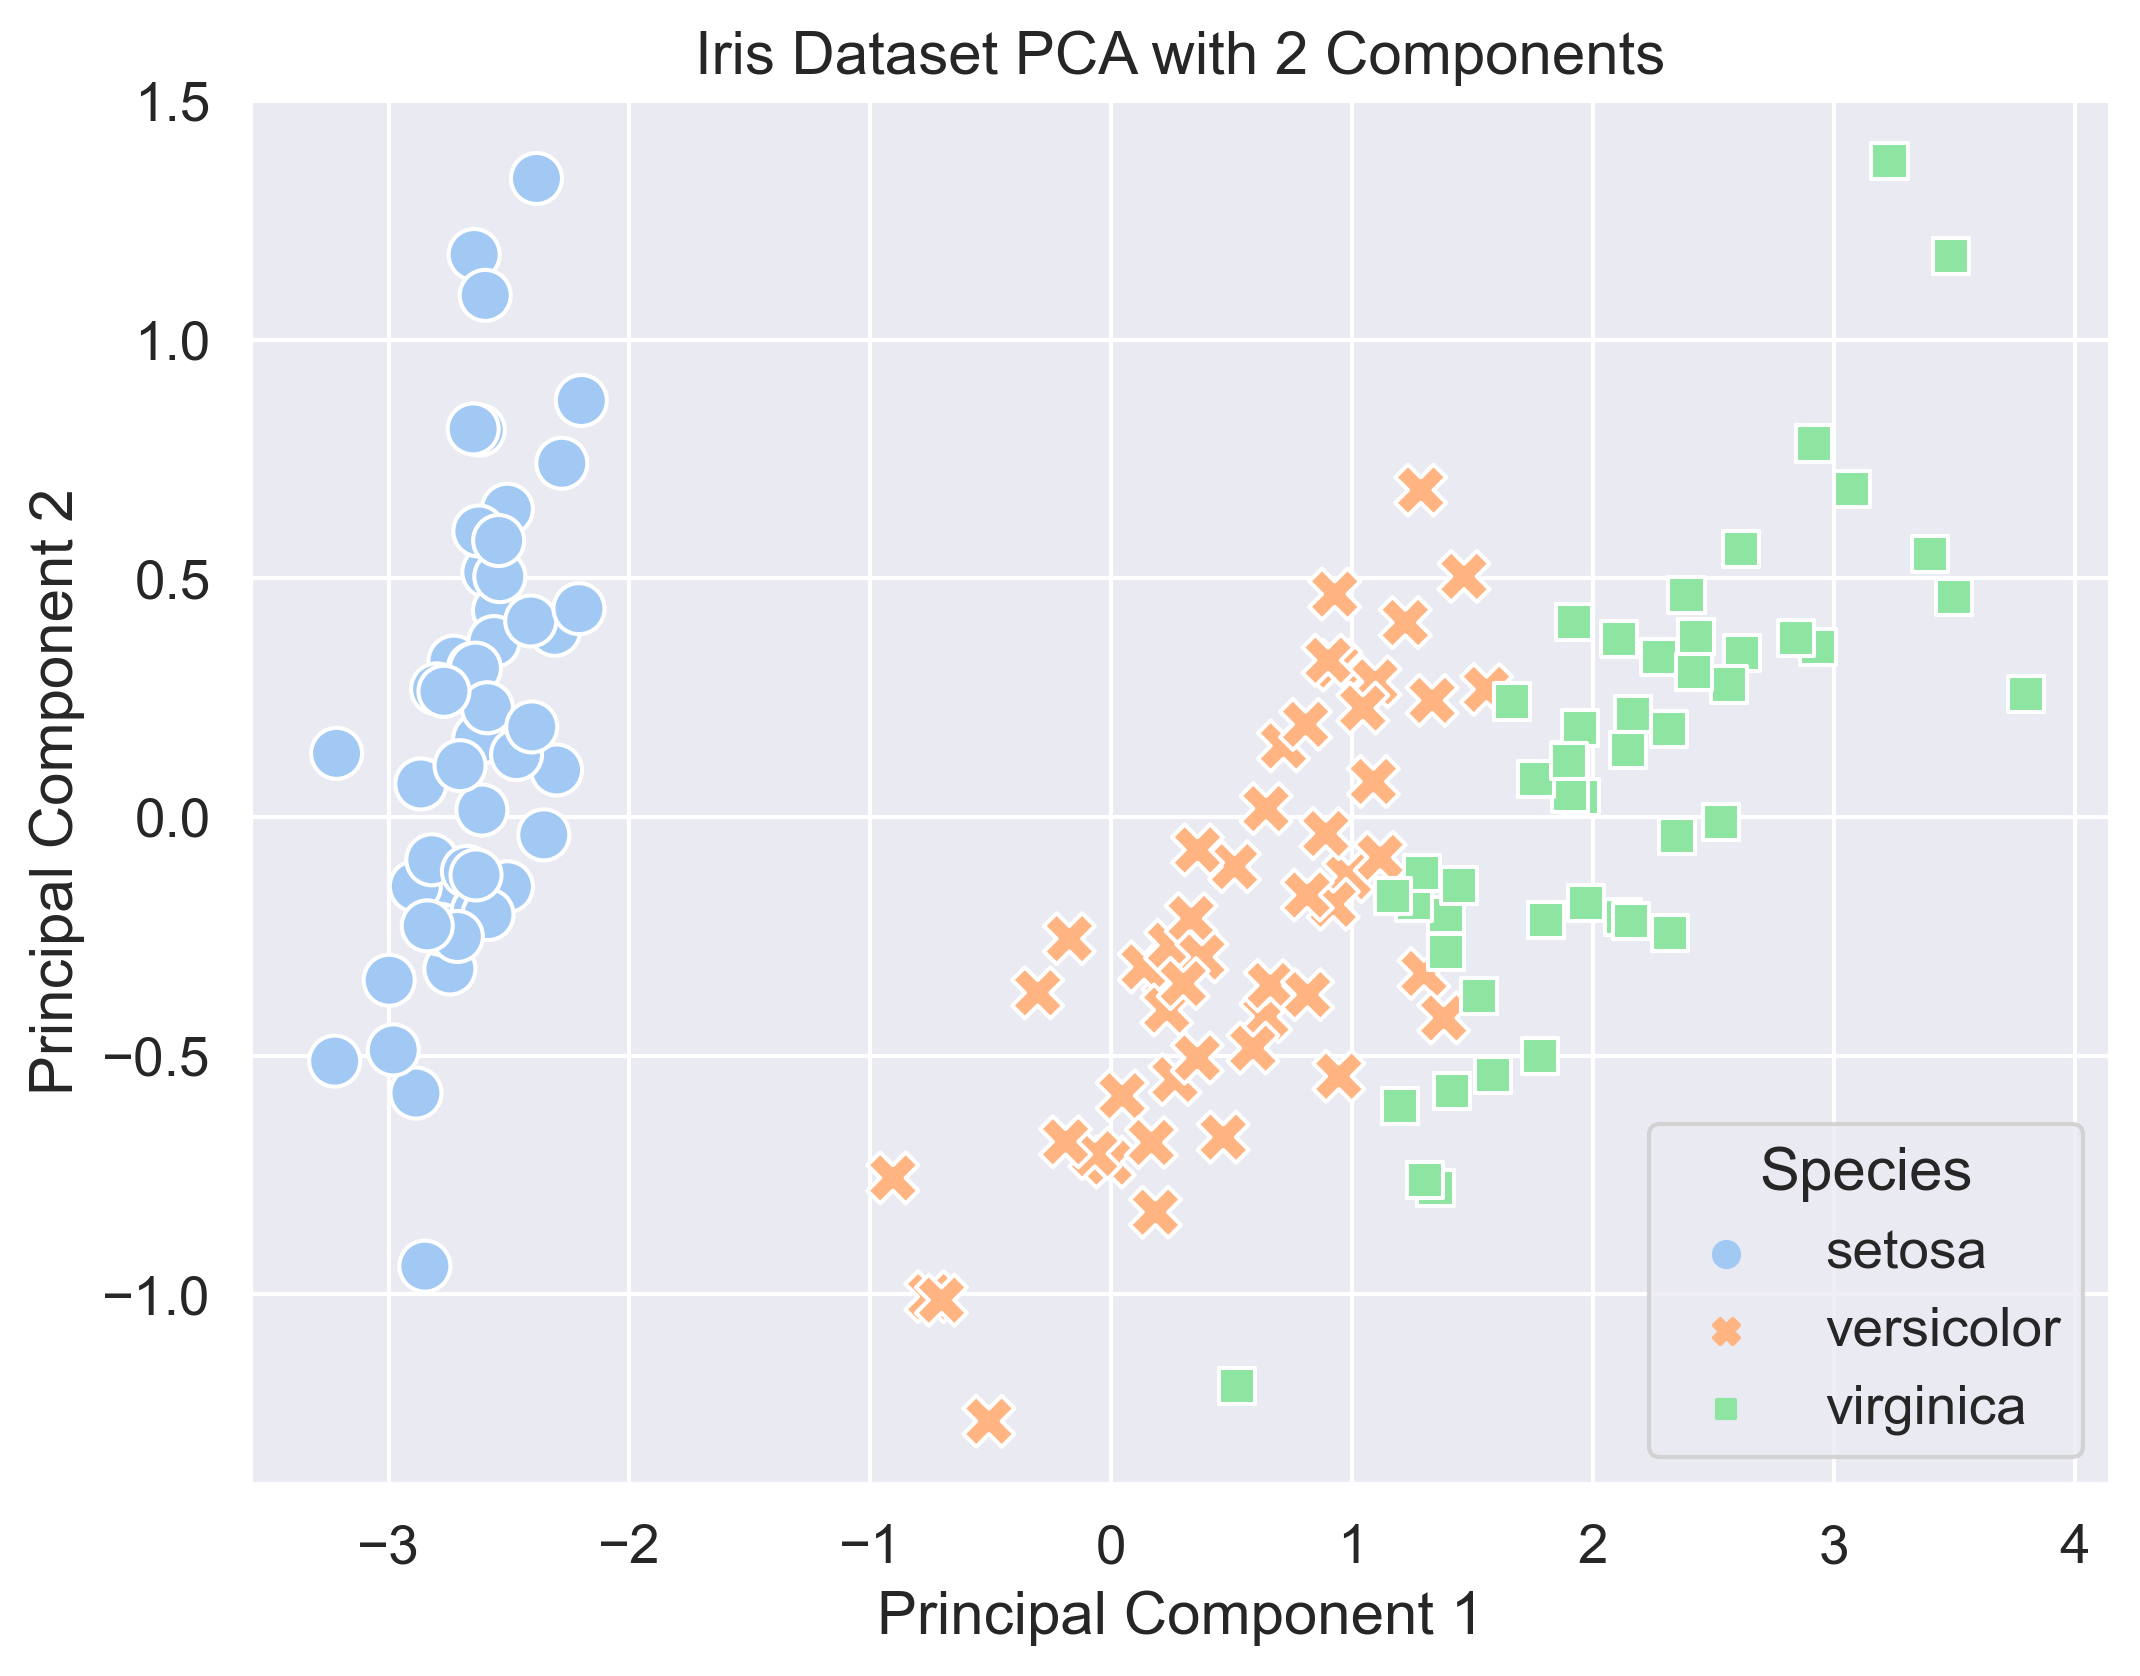

In [59]:
# Imports
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get X and y
X = datasets.load_iris().data
y = datasets.load_iris().target

# Create PCA object
pca = PCA(n_components = 2)

# Transform features with pca
components = pca.fit_transform(X)

# Create dataframe for plot
df = pd.DataFrame(components,
                  columns = ['Principal Component 1', 'Principal Component 2'])
df['Species'] = datasets.load_iris().target_names[y]

# Set sns styling
sns.set(style="darkgrid",
        font_scale=1.2)

# Create figure
plt.figure(figsize=(8, 6), dpi=300)

# Make Scatterplot
sns.scatterplot(data = df,            
                x = 'Principal Component 1',
                y = 'Principal Component 2',
                hue = 'Species',
                style = 'Species',
                palette = "pastel",
                s = 150)
plt.title('Iris Dataset PCA with 2 Components')
plt.show()

From this visualization, we can see that the setosa samples appear to be linearly separable from the rest of the dataset. Additionally, it seems to be a bit harder to separate versicolor and virginica samples. They are not heavily mixed however, since versicolor samples appear to the left of the virginica samples and we see that each species is grouped with its own. Because they are not too heavily mixed, it should not be too difficult for our Naive Bayes model to separate the two.  
  
This visualization is good, but we still do not know much about the characteristics of the features themselves. At this point, all we know is that our data does appear to have some grouping to it. To take a look at each feature independently of the others, we can utilize a violin plot. A violin plot is similar to a box-and-whisker plot and shows the distribution of our data points after grouping them. The violins are drawn using kernel density estimates of the underlying distributions for our groupings. We will plot each feature as its own 'violin' to view the feature distributions for each class. This means 1 violin for each feature for each class. Giving us a total of 12 violins. To make this visualization easier to understand, we will stack them vertically in a line using matplotlib subplots. The code below makes this visualization.

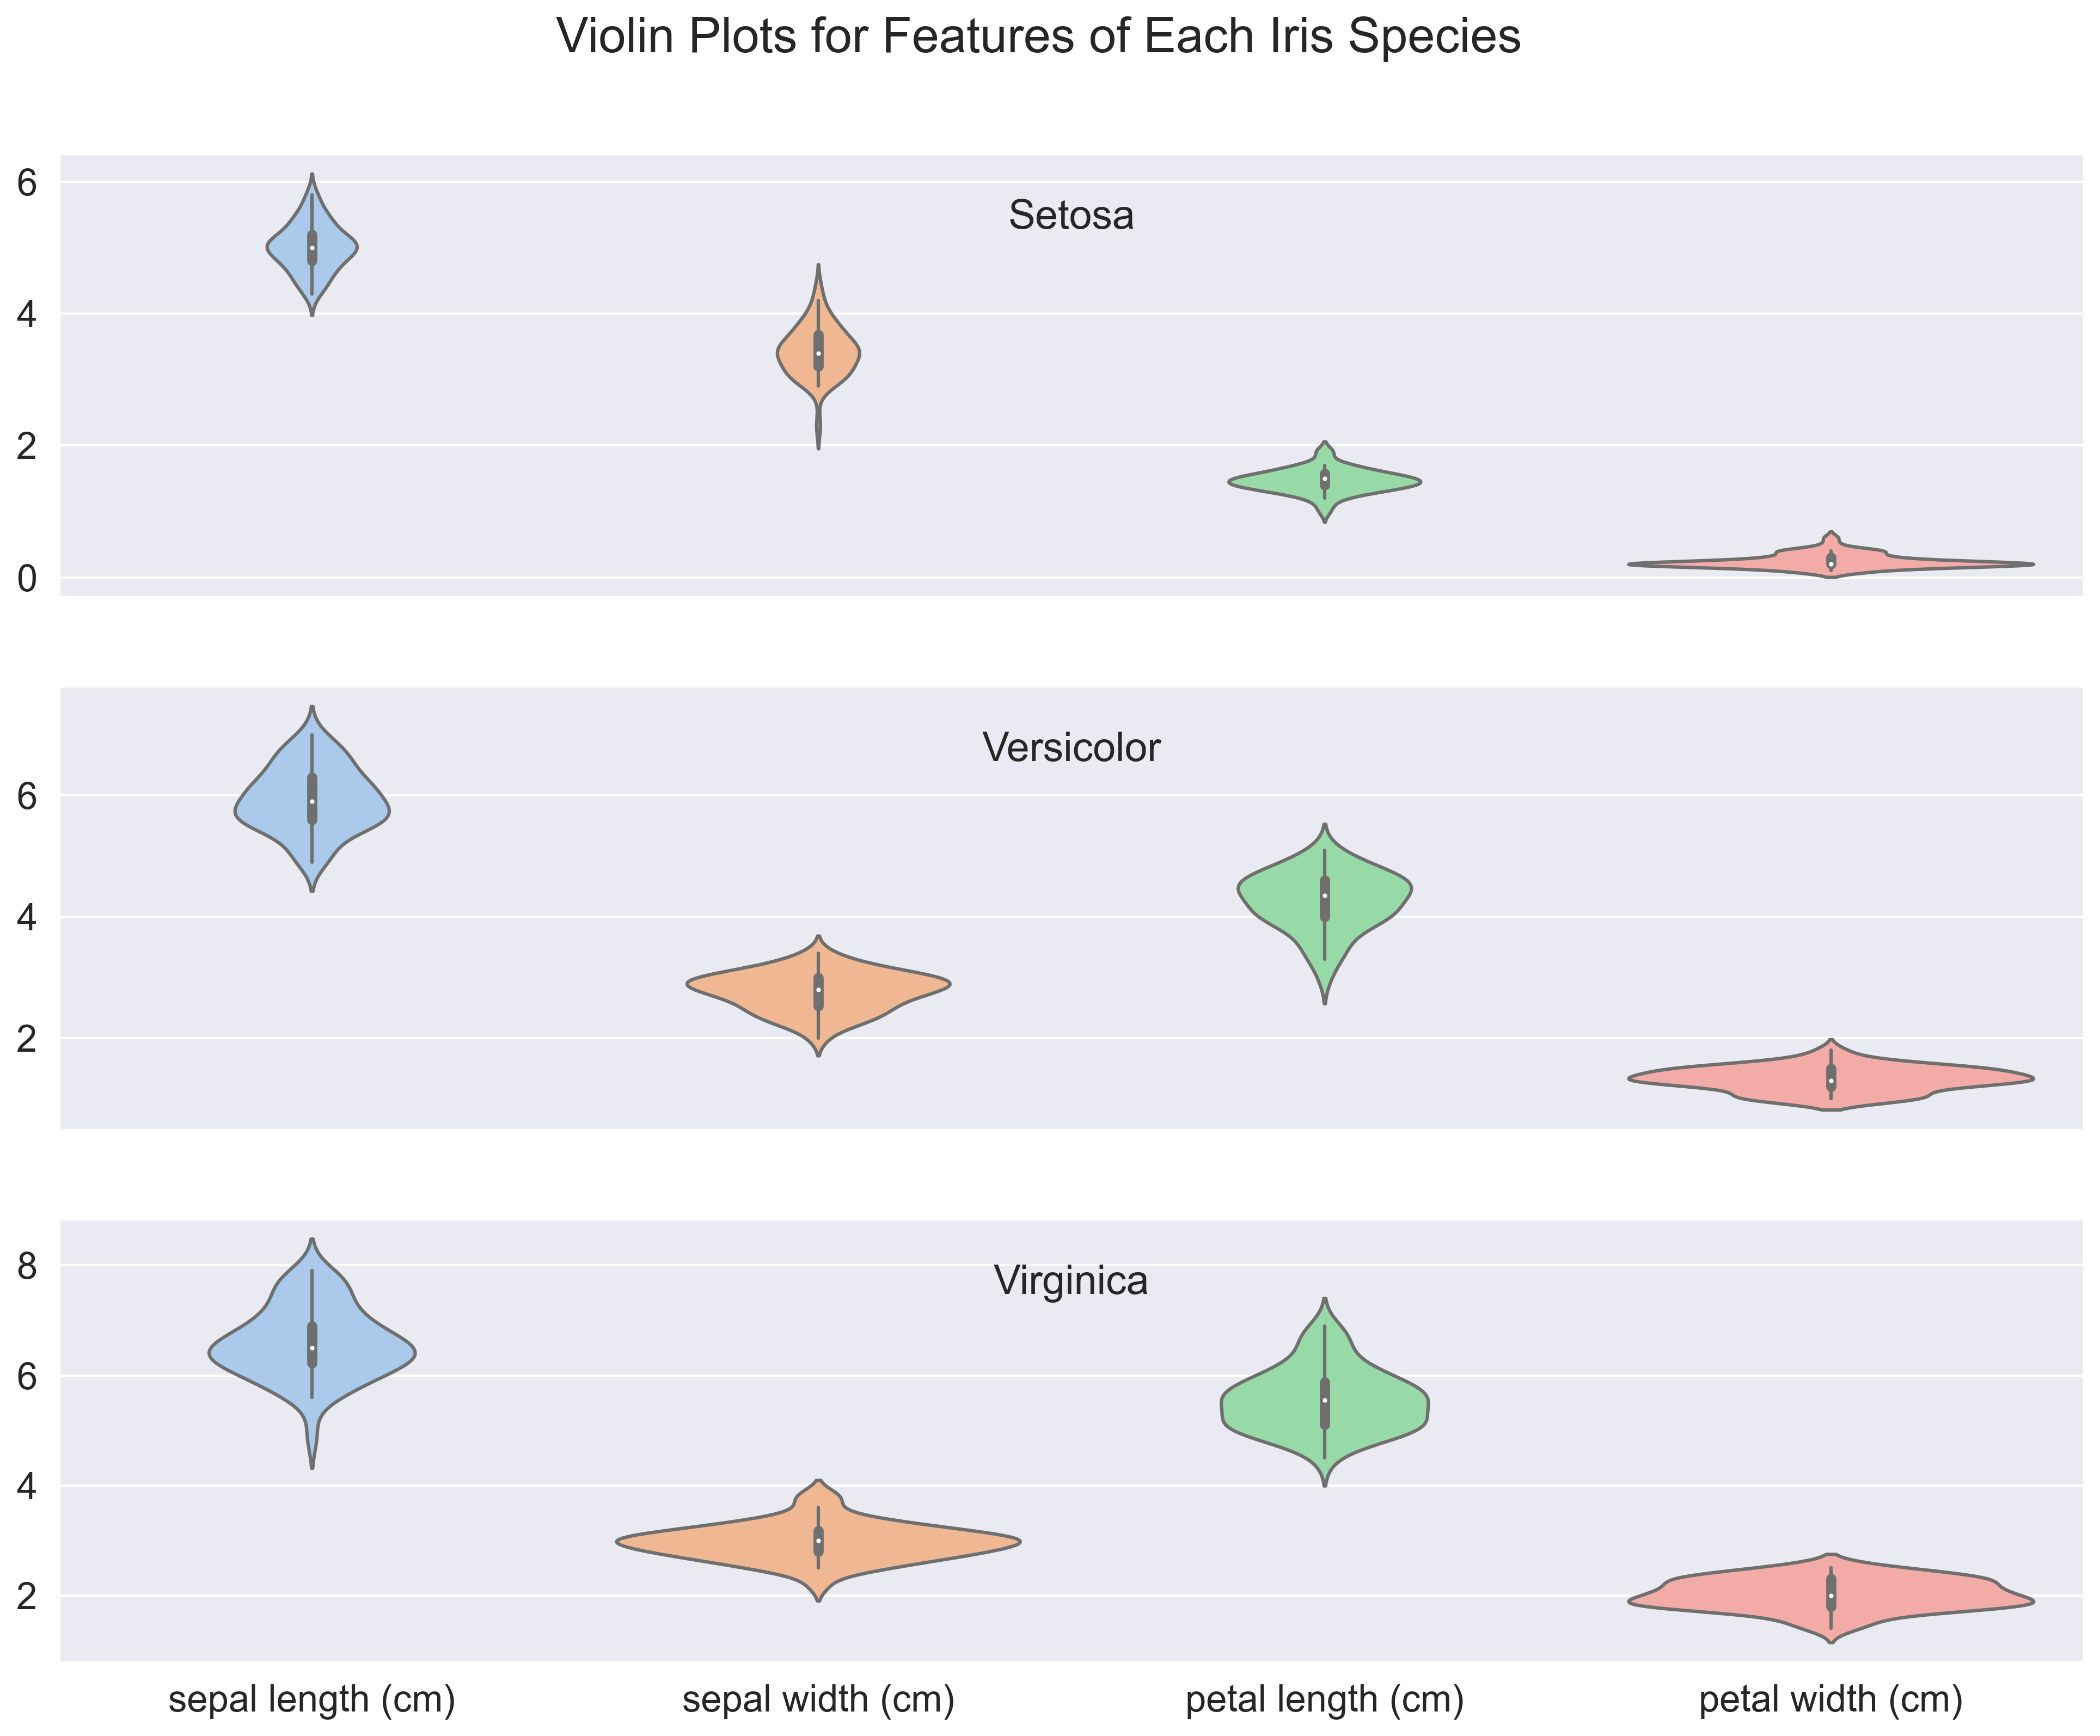

In [81]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create three dataframes, one for each class
setosa_df = data[data['target'] == 0]
versicolor_df = data[data['target'] == 1]
virginica_df = data[data['target'] == 2]

# Set sns styling
sns.set(style="darkgrid",
        font_scale=1.5)

# Create subplots
fig, axes = plt.subplots(nrows = 3,
                         ncols = 1,
                         figsize = (16, 12),
                         dpi = 300,
                         sharex = True)

# Create violin plots for each feature for each class
for row, df in enumerate([setosa_df, versicolor_df, virginica_df]):
    sns.violinplot(data = df.iloc[:, :-1],
                   ax = axes[row],
                   palette='pastel')
    axes[row].set_title(f'{datasets.load_iris().target_names[df.iloc[0, -1]]}'.capitalize(),
                        y = 0.80)
    
plt.suptitle('Violin Plots for Features of Each Iris Species', y = 0.95)
plt.show()

This is a pretty complicated plot, so lets break it down. The shapes of each violin are the estimated distributions for each feature, which are then flipped over to make the whole violin shape. Some key takeaways are how the distributions of each feature change by species. For example, the petal length for setosa are all pretty short (under 2cm), while both versicolor and virginica have petal lengths above 2cm. This is likely why setosa samples were separated away from the others in our PCA plot from earlier. Finally, we can see how petal width for versicolor are less than 2cm while those for virginica range from 0 to around 3cm. There are many other small details we can investigate here, but this is enough to tell us that we (in theory) should be able to build a model which can correctly separate and classify there samples.  
  
# Applying Naive Bayes
Now that we have a decent understanding of the structure of our dataset, we can apply our machine learning model to make class predictions. First, however, let's do a sanity check to make sure that our data does not have any missing data values.

In [82]:
# Check for missing values
has_na = data.isna().any().any()

print("Data contains missing values. :(" if has_na
      else "Data does not have any missing values. :)")

Data does not have any missing values. :)


Great!  
  
Another thing to note here is that since we are using a probabilistic model, data scaling is not needed. So, we are essentially done with most of our preprocessing steps. The only thing remaining is to split our data into train and test sets. For this, we will just make use of sklearn's train_test_split() function. We will use 1/3 of the dataset for testing, while also setting the stratify parameter to ensure that each of the split sets have equal class balances.

In [84]:
# Import
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 1/3,
                                                    random_state = 42,
                                                    stratify = y)

We are now ready for our model. Here, we will be using a specific variant of the traditional Naive Bayes model known as a Gaussian Naive Bayes model. While both are based on the same fundamental principles of Bayes' Theorem and the assumption of feature independence, they differ in their handling of numerical data. The traditional Naive Bayes model assumes that features are categorical and have a discrete distribution, often modeled by using probability mass functions. Iris, however, does not contain categorical data. Therefore, we will be using the Gaussian Naive Bayes model which assumes that features follow a Gaussian (normal) distribution. Gaussian Naive Bayes models are tailored for datasets with numerical (continuous) features, like we have with the Iris dataset.  
  
The sklearn package implements a Gaussian Naive Bayes model. We will first create the model and then train it on the training set.

In [110]:
# Import
from sklearn.naive_bayes import GaussianNB

# Create naive bayes model
naive_bayes = GaussianNB()

# Fit naive bayes model on training set
naive_bayes.fit(X_train, y_train)

GaussianNB()

Perfect! Our model is now trained and ready for evaluation.

# Evaluation
With our model now trained, let us evaluate it. For classification, a popular way of visualizing a model's performance is with a confusion matrix. First, however, we need some predicitions on the test set.  
  
So, we will begin by getting the predictions from our model on the testing set. Then, we will compute a confusion matrix with the confusion_matrix() function from sklearn. After that, we will use seaborn's heatmap to visualize the matrix and then print out an sklearn classification report to get precision, recall, f1-score, and support for our model.

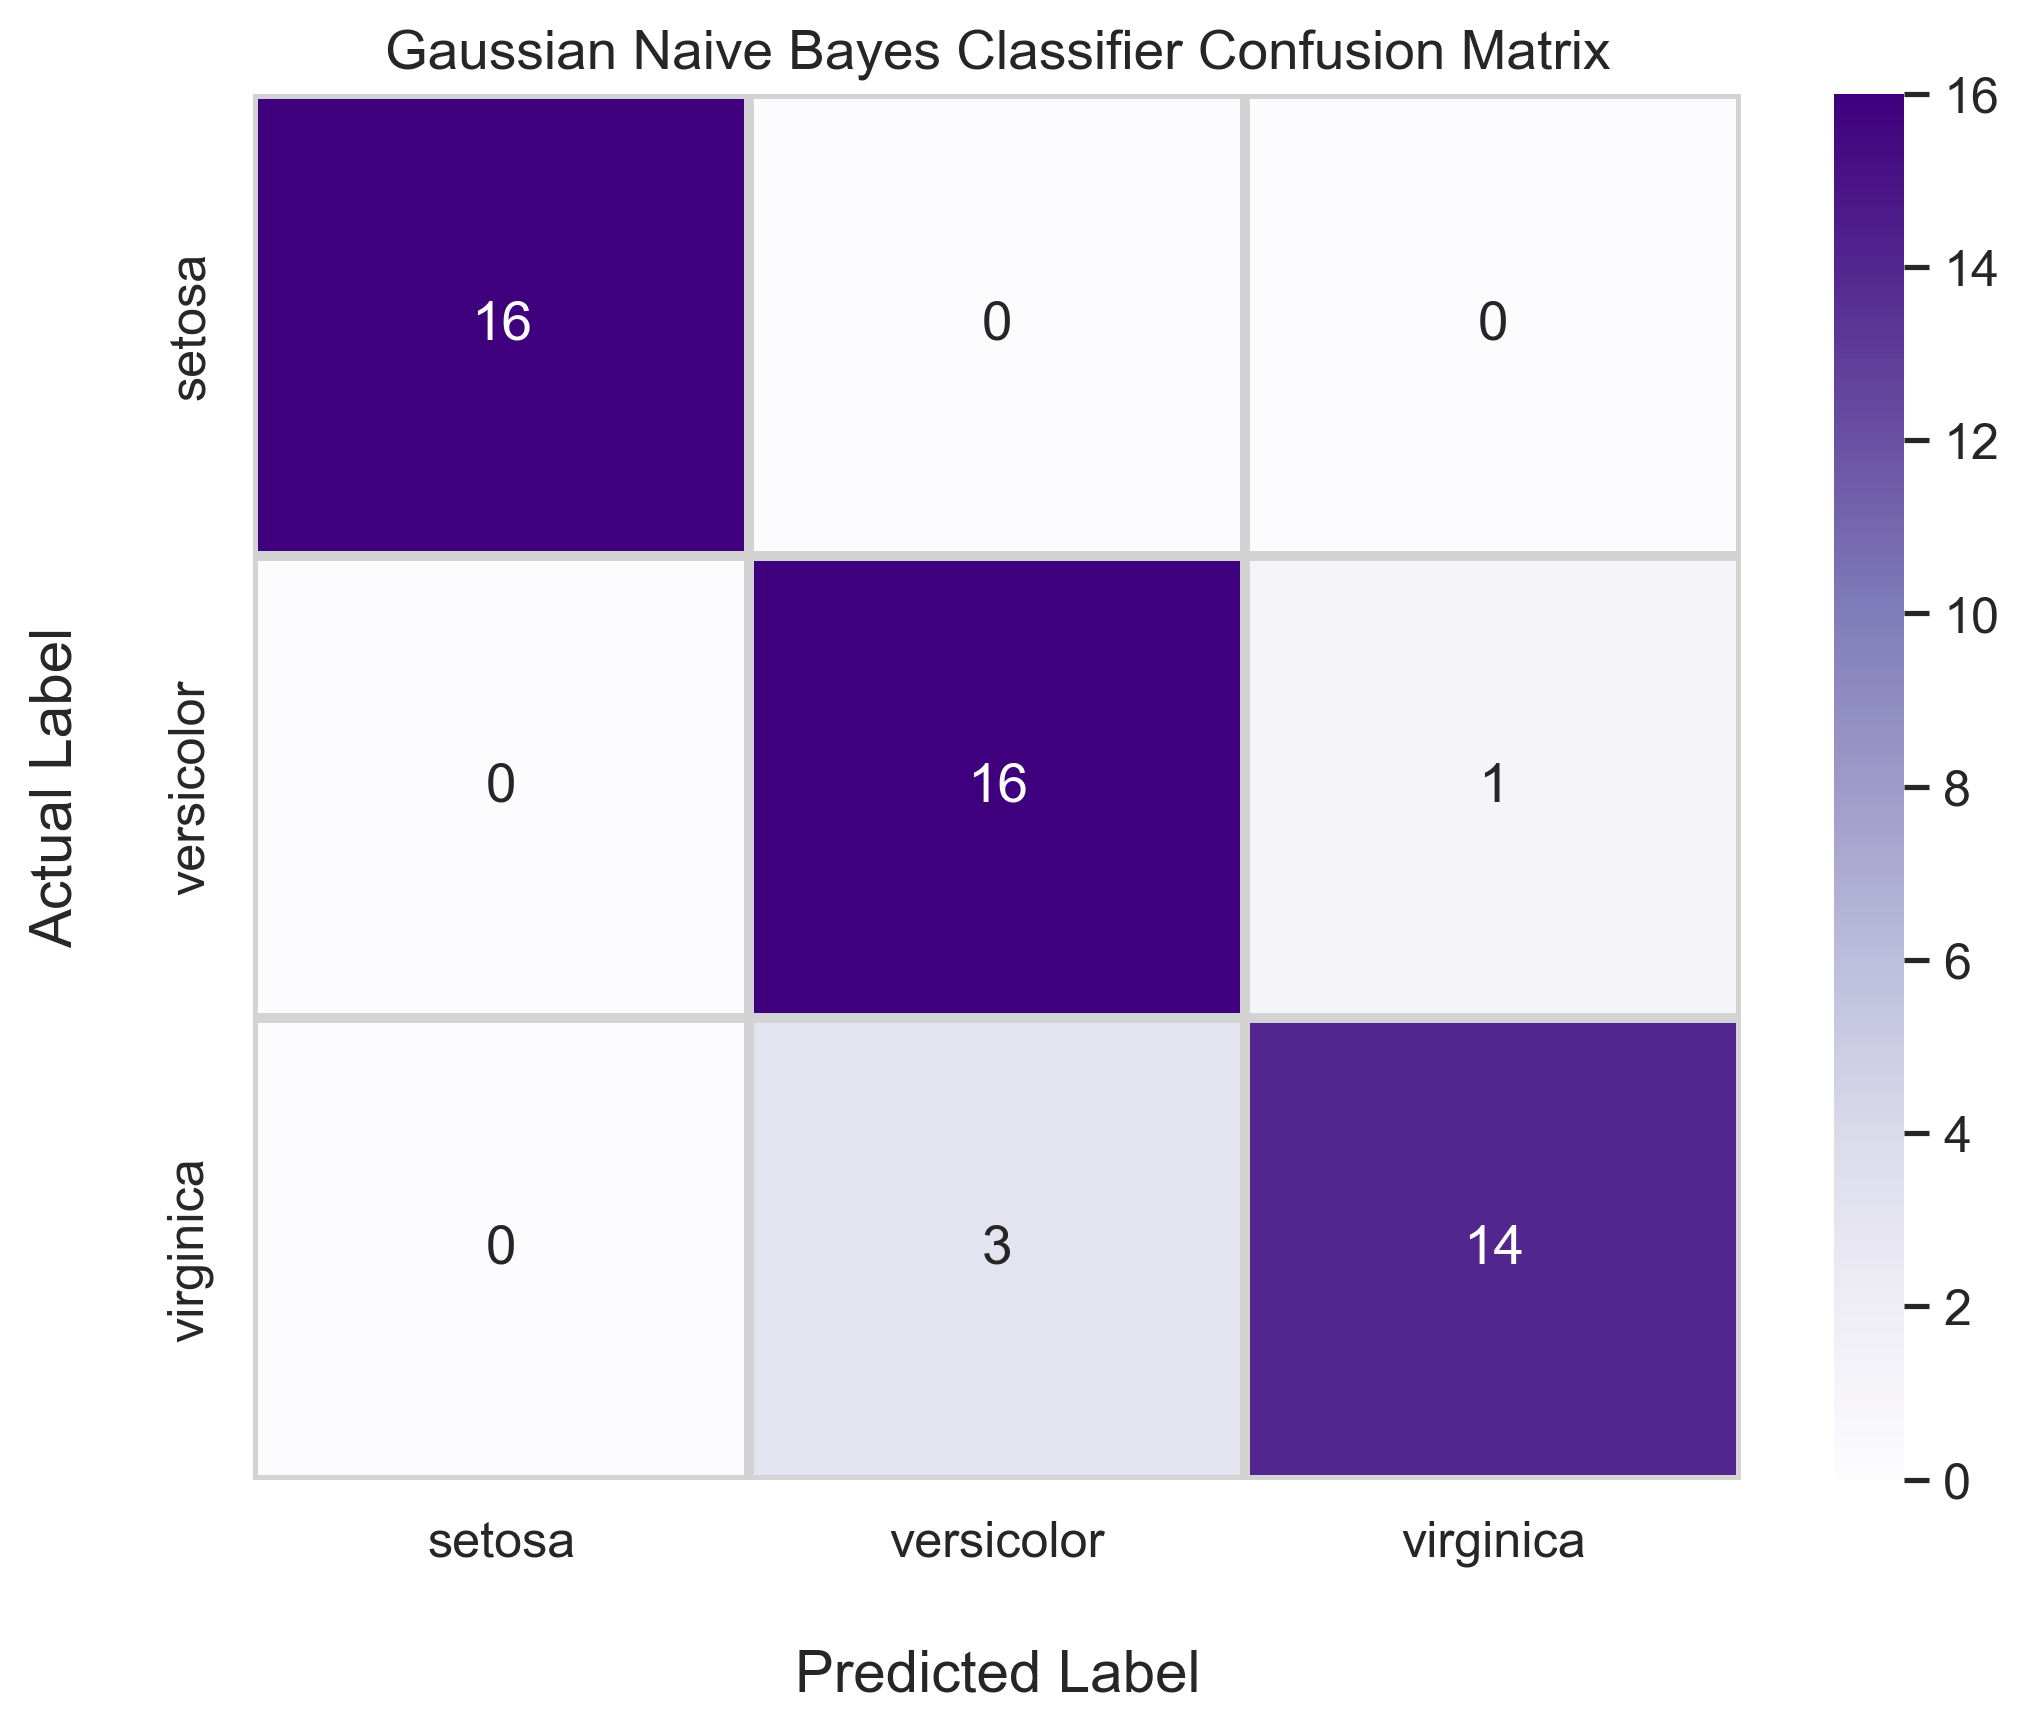

                    ---Classification Report---      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.84      0.94      0.89        17
           2       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [111]:
# Imports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Predict
y_pred = naive_bayes.predict(X_test)

# Make Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = datasets.load_iris().target_names,
                     columns = datasets.load_iris().target_names)

# Display Confusion Matrix
plt.figure(figsize=(8,6), dpi=300)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cm_df, annot=True, fmt='d', linewidths=2, linecolor='#d3d3d3', cmap='Purples')
ax.set_title('Gaussian Naive Bayes Classifier Confusion Matrix')
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)
plt.show()

# Print classification report
print(' '*14 + '---Classification Report---'.center(39))
print(classification_report(y_test, y_pred))

Looks good! So, it seems like our naive bayes model was able to predict the iris species pretty well. The model was able to perfectly classify all setosa samples, and only mixed up the versicolor and virginica samples. This aligns with what we saw earlier, where the versicolor and virginica samples ended up being nearby to each other in our PCA visualization. This is also confirmed in our classification report, where class 0 (setosa) saw perfect score across the board, while versicolor and virginica scores ranged between 0.82 and 0.94.  
  
Despite some confusion in the versicolor and virginica scores, we achieved over 0.9 in the macro averaged precision, recall, and f1-scores. The support here refers to the number of occurrences of each class in our dataset. Overall, our model was 92% accurate in classifying the iris flower species based only on our four features. That's pretty good!  
  
# Conclusion
Today, we were able to dive into how probability theory and how the Bayesian approach can be applied to machine learning. From covering foundational concepts of probability theory and Bayes' Theorem to actually applying a probabilistic Naive Bayes model on a real dataset, we have illuminated the synergy between statistical principles and machine learning.  
  
As we walked through this project while applying a Bayesian perspective and updating beliefs with each sepal and petal measurement in our data, we not only gained a deeper understanding of probability theory but also practical insights on how this understanding can be used for traditional classification tasks.  
  
As always, I hope you learned something today and urge you to continue learning whenever you can. The world may be complex, but that is why we developed such tools as these to cope. To end this off, enjoy yourself and do not forget that everybody starts somewhere. The basic understandings from today will flourish into a firm grasp on the foundational concepts which make up your future work anywhere. Good luck and goodbye!

\* ／l、  
（ﾟ､ ｡ ７  
　l、 ~ヽ  
　じしf_, )ノ  